# CAR DATA EDA

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### ★ Aim
- This project aims to predict the Price of an used Car by taking it's Company name, it's Model name, Year of Purchase, and other parameters.


### ★ Data Collection
- Data was scraped from Quikr.com (https://quikr.com)
- Link for data: https://github.com/krishnarajpatil/Car_Price_Predictor/blob/main/notebook/data/quikr_car.csv

## 1. Importing data and required packages

#### 1.1 importing Pandas, Numpy & Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

#### 1.2 import the CSV Data as Pandas DataFrame

In [2]:
car_data = pd.read_csv("data/quikr_car.csv")

#### 1.3 Show Top 5 Records

In [3]:
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


#### 1.4 Shape of the dataset

In [4]:
car_data.shape      # it's have 892 rows and 6 columns

(892, 6)

#### 1.5 Dataset Information

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
car_data.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
car_data['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
car_data['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [9]:
car_data['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [10]:
car_data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [11]:
car_data['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

#### 1.6 Quality of Dataset
1. name - keep first 3 words of name
2. year has many non-year values --- remove it
3. convert year object into integer
4. Price has "Ask for price" --- remove it
5. convert Price object into integer
6. kms_driven has kms with numebers --- separate kms
7. convert kms_driven into integer
7. kms_driven has nan values --- handle it
8. fuel type has nan values --- handle it

#### 1.7 Creating backup

In [12]:
backup = car_data.copy()

## 2. Cleaning Data

#### 2.1 Year has many non-year values

In [13]:
car_data = car_data[car_data['year'].str.isnumeric()]

#### 2.2 Convert year object into integer

In [14]:
car_data['year'] = car_data['year'].astype(int)

#### 2.3 Price has "Ask for price"

In [15]:
car_data = car_data[car_data['Price'] != "Ask For Price"]

#### 2.4 Convert Price object into integer

In [16]:
car_data['Price'] = car_data['Price'].str.replace(",", "").astype(int)

#### 2.5 kms_driven has kms with numebers

In [17]:
car_data['kms_driven'] = car_data['kms_driven'].str.split().str.get(0).str.replace(',', '')

#### 2.6 kms_driven has nan values

In [18]:
car_data = car_data[car_data['kms_driven'].str.isnumeric()]

#### 2.7 Convert kms_driven into integer

In [19]:
car_data['kms_driven'] = car_data['kms_driven'].astype(int)

#### 2.8 fuel type has nan values

In [20]:
car_data = car_data[~car_data['fuel_type'].isna()]

In [21]:
car_data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


#### 2.9 name and company had spammed data, but with the previous cleaning, those rows got removed.
#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [22]:
car_data['name'] = car_data['name'].str.split().str.slice(start=0, step=3).str.join(" ")

#### 2.10 Resetting the index of the final cleaned data

In [23]:
car_data = car_data.reset_index(drop=True)

#### 2.11 Checking Data info

In [24]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [25]:
car_data.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


## 3. Cleaned Data

In [26]:
car_data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai XO III,Hyundai,2007,80000,45000,Petrol
1,Mahindra MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Magna VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford 1.5L,Ford,2014,575000,36000,Diesel
4,Ford,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti VXI,Maruti,2011,270000,50000,Petrol
812,Tata DLE,Tata,2009,110000,30000,Diesel
813,Toyota,Toyota,2009,300000,132000,Petrol
814,Tata Diesel,Tata,2018,260000,27000,Diesel


## 4. Exploring Data

In [27]:
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai XO III,Hyundai,2007,80000,45000,Petrol
1,Mahindra MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Magna VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford 1.5L,Ford,2014,575000,36000,Diesel
4,Ford,Ford,2012,175000,41000,Diesel


#### 4.1 Define numerical & categorical features

In [28]:
numeric_features = [feature for feature in car_data.columns if car_data[feature].dtype != 'O']
categorical_features = [feature for feature in car_data.columns if car_data[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['year', 'Price', 'kms_driven']

We have 3 categorical features : ['name', 'company', 'fuel_type']


#### 4.2 Checking relationship of Company with Price

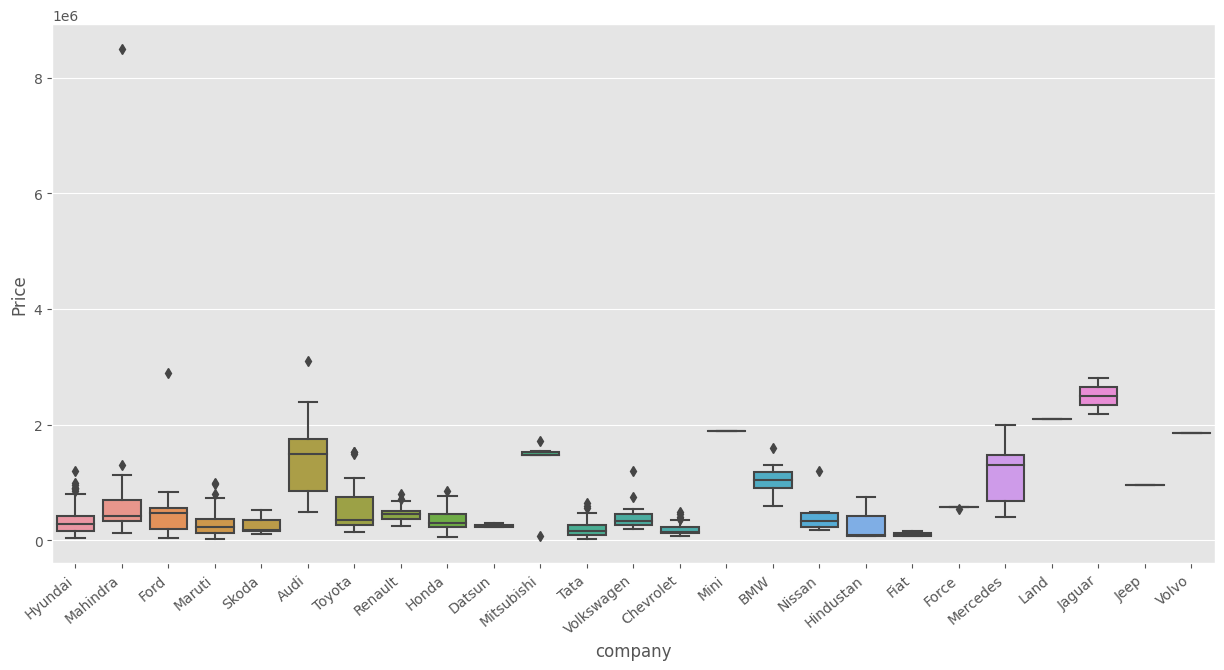

In [29]:
plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='company',y='Price',data=car_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [30]:
car_data[car_data['Price'] > 6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra,Mahindra,2014,8500003,45000,Diesel


In [31]:
car_data = car_data[car_data['Price'] < 6e6].reset_index(drop=True)  ## 6e6 == 6000000

In [32]:
car_data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai XO III,Hyundai,2007,80000,45000,Petrol
1,Mahindra MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Magna VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford 1.5L,Ford,2014,575000,36000,Diesel
4,Ford,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti VXI,Maruti,2011,270000,50000,Petrol
811,Tata DLE,Tata,2009,110000,30000,Diesel
812,Toyota,Toyota,2009,300000,132000,Petrol
813,Tata Diesel,Tata,2018,260000,27000,Diesel


##### Again checking, relationship of Company with Price

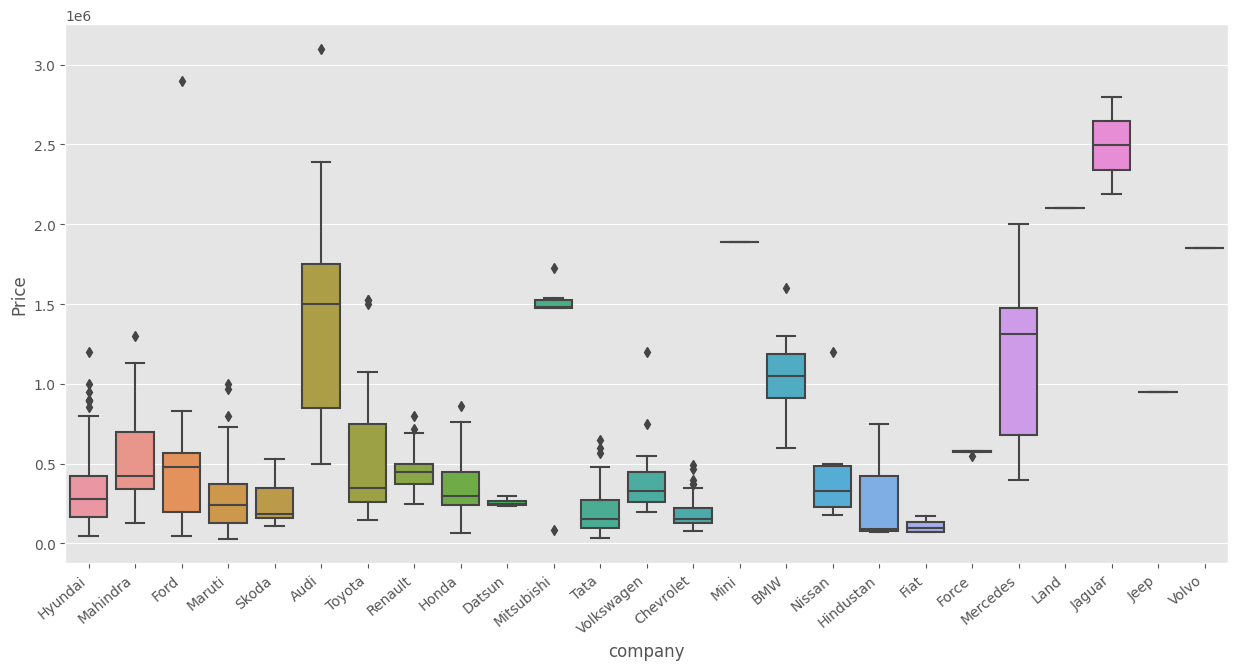

In [33]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

#### 4.3 Checking relationship of Year with Price

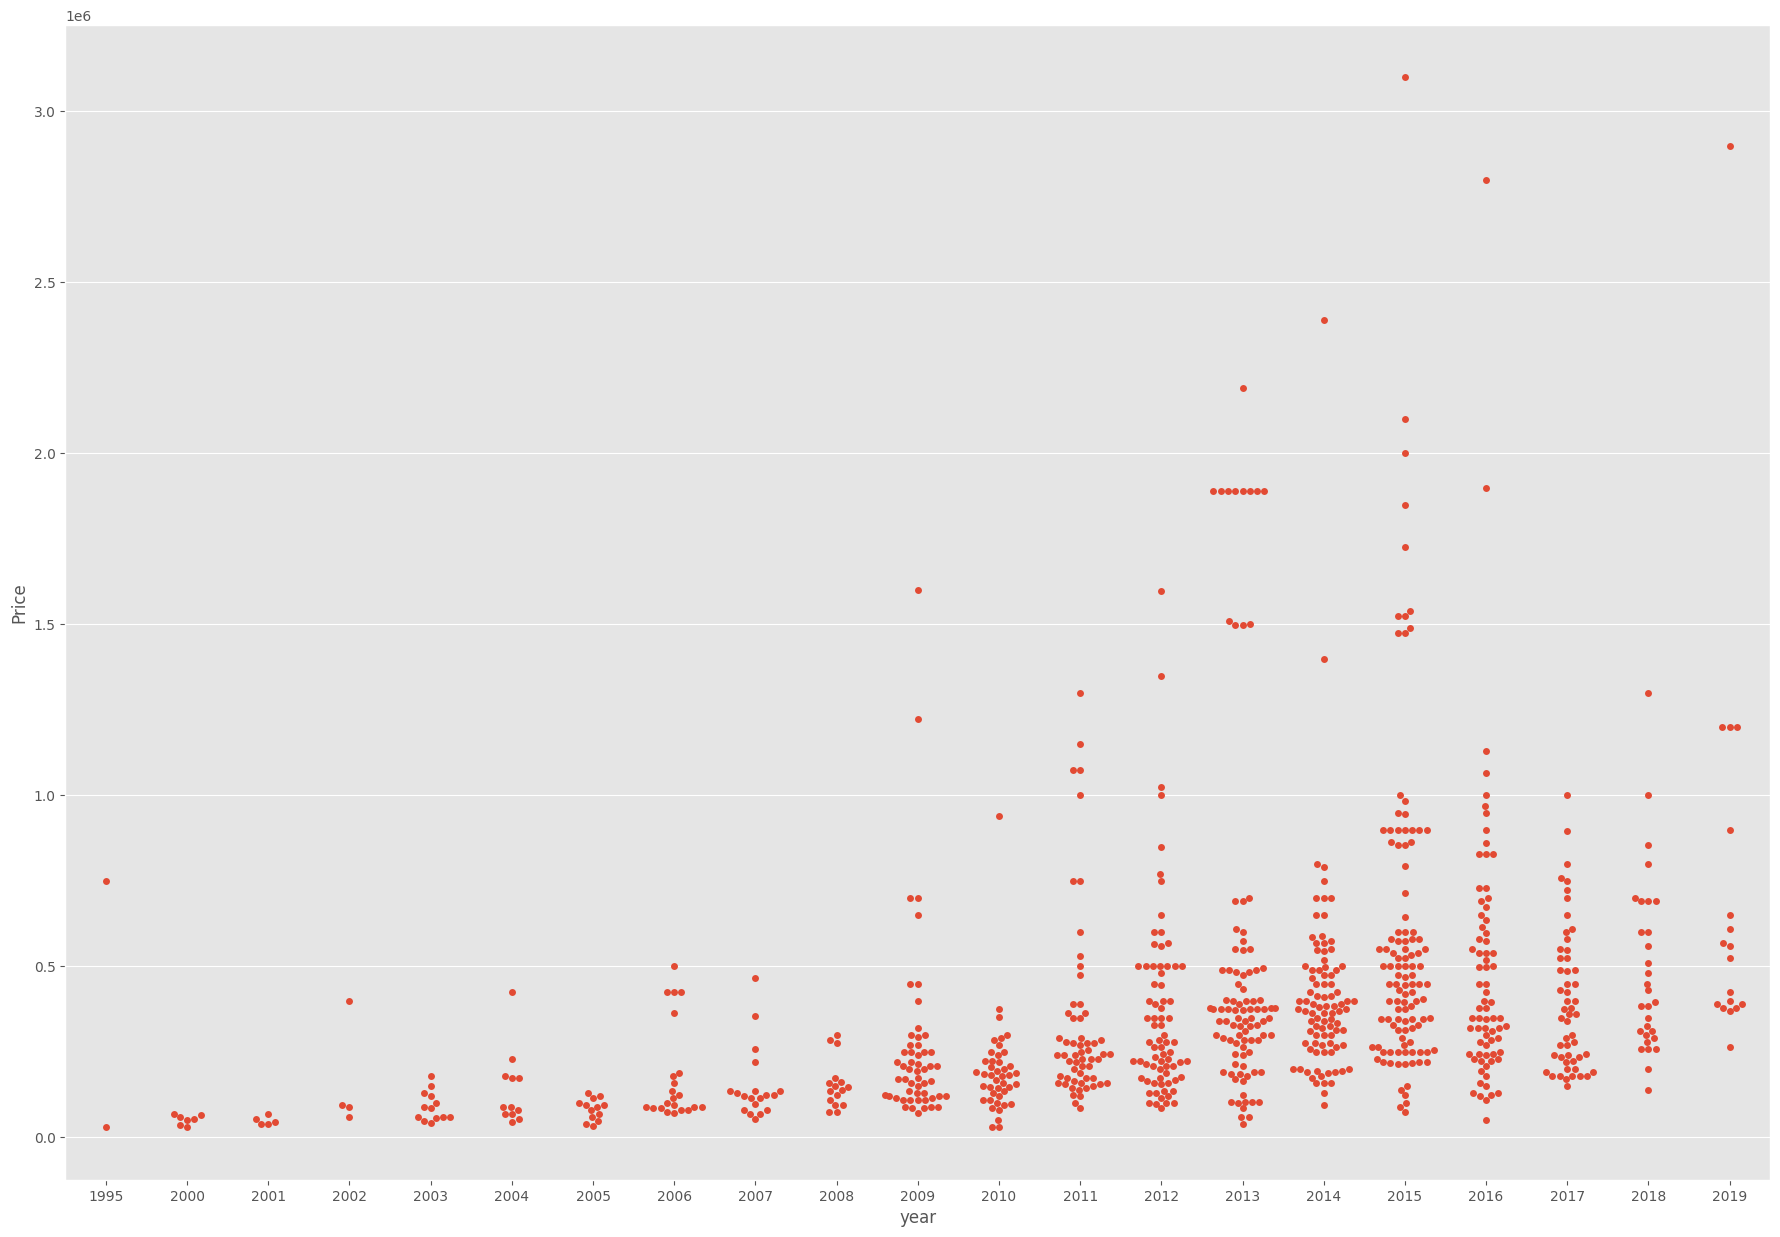

In [34]:
plt.subplots(figsize=(22,15))
sns.swarmplot(x='year',y='Price',data=car_data)
plt.show()

#### 4.4 Checking relationship of kms_driven with Price

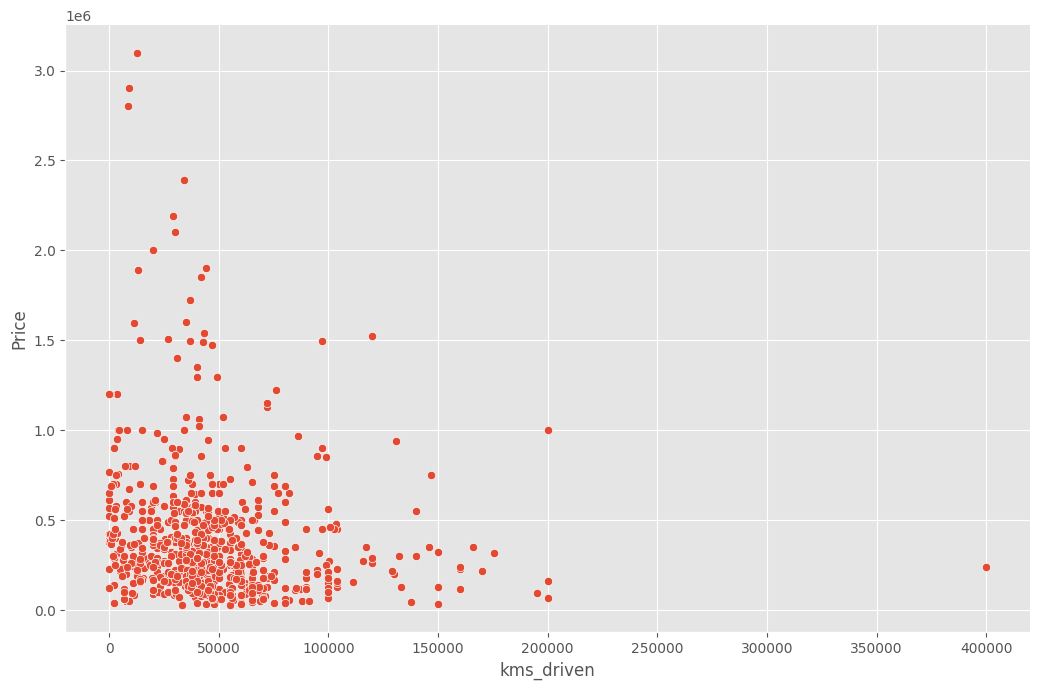

In [35]:
sns.relplot(x='kms_driven',y='Price',data=car_data,height=7,aspect=1.5)

#### 4.5 Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

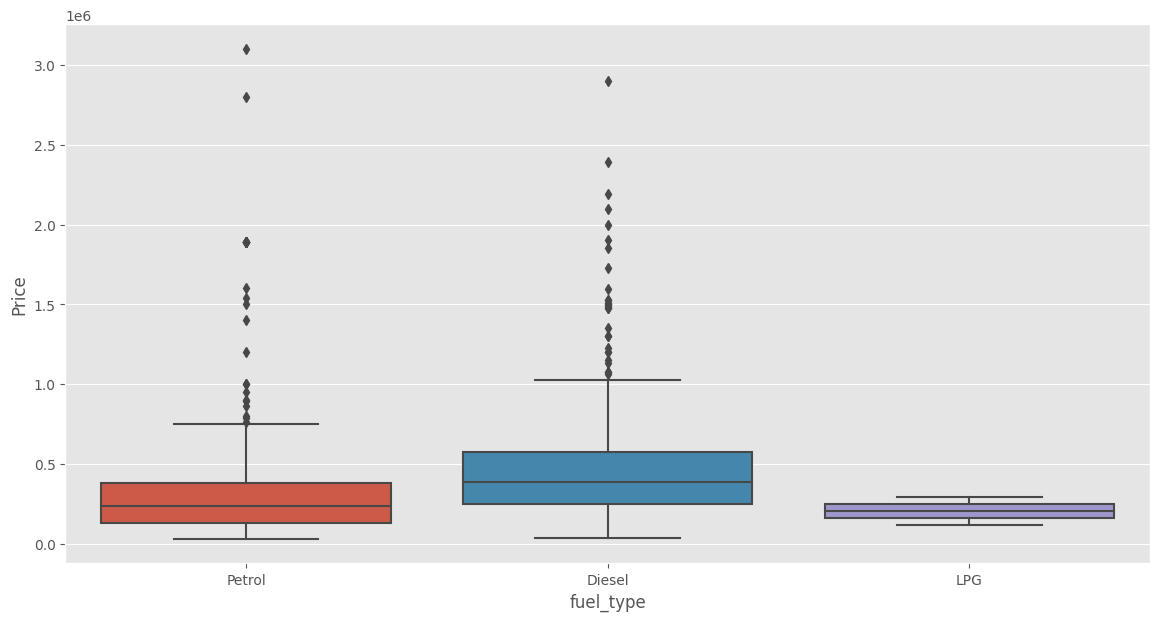

In [36]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car_data)

#### 4.6 Relationship of Price with FuelType, Year and Company mixed

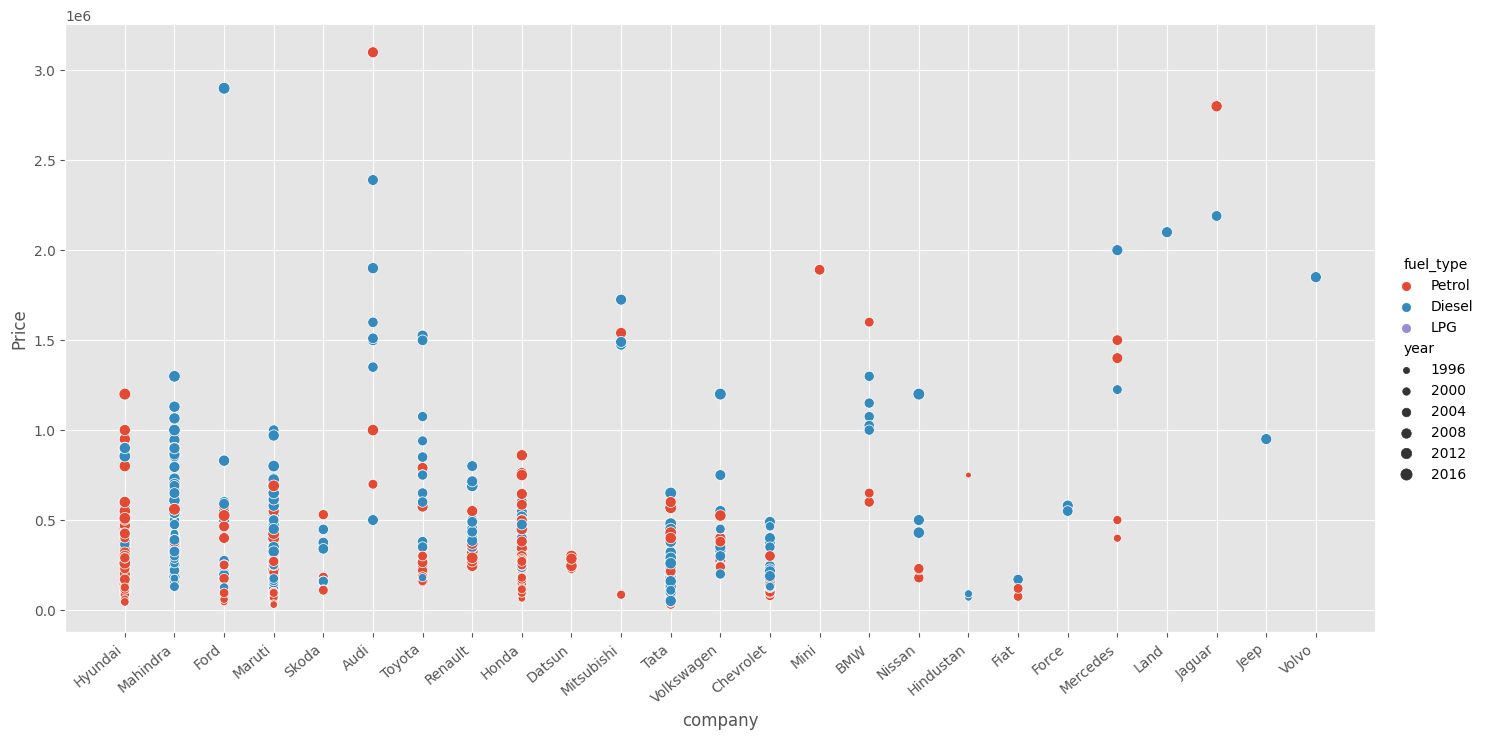

In [37]:
ax=sns.relplot(x='company',y='Price',data=car_data,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## 5. Saving cleaned car data

In [38]:
car_data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai XO III,Hyundai,2007,80000,45000,Petrol
1,Mahindra MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Magna VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford 1.5L,Ford,2014,575000,36000,Diesel
4,Ford,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti VXI,Maruti,2011,270000,50000,Petrol
811,Tata DLE,Tata,2009,110000,30000,Diesel
812,Toyota,Toyota,2009,300000,132000,Petrol
813,Tata Diesel,Tata,2018,260000,27000,Diesel


In [39]:
car_data.to_csv("data/cleaned_car_data.csv")